# PART 1 : THE SNOWPLOW PROBLEM

## 1.1 Introduction
A snowplow must clean the snow in front of n houses, n ∈N. The position of
each house is represented by a float number (not necessary positive), hence we as-
sume that all houses are on a given one dimensional road.  

Initially, the snowplow is in 0. The traveling time of the snowplow is equivalent to
the distance that it went through since the beginning of the day. If there are several
houses at the same point, it does not take a longer time to clean the snow (the snow
is cleaned as soon as the snowplow has passed). However, since the positions of the
houses are represented as floats, this won’t happen (with a very high probability).  

The snowplow must minimize the average waiting time of the houses, before
the snow is cleaned in front of their doorstep. This minimization is from the point
of view of the houses (and not from the point of view of the snowplow). The total
distance traveled by the snowplow is not relevant itself.

## 1.2 Exercise
1) Propose a n ∈N(it does not need to be large n = 10 is fine) and a configuration
of the houses where the optimal order of cleaning is not obtained by either :
    - sorting the houses positions and cleaning them in that order.
    - going to the closest house at each time step.
2) Propose and implement a polynomial-time algorithm (in terms of the number
of houses) based on the positions of the houses, in order to clean the snow. If it is
not polynomial (if it is exponential for example) we saw in class that it would not
be able to be run in a reasonable time.

In [1]:
import numpy as np

# n_houses = 30
# scale_houses = 10
# house_positions = np.random.normal(0, scale_houses, n_houses).tolist()
# house_positions

house_positions = [-10, -2, 1, 5, 6, 7, 10]
expected_positions = [1, 5, 6, 7, 10, -2, -10]

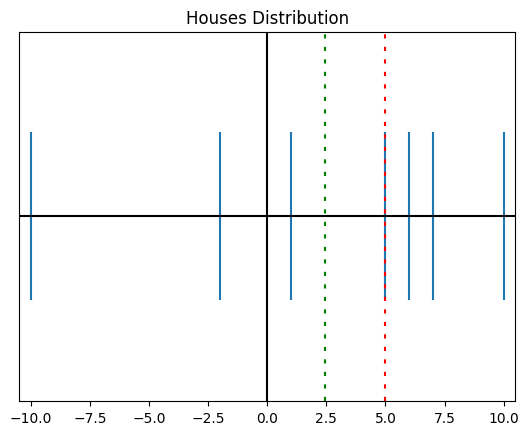

In [3]:
import matplotlib.pyplot as plt

def display_house_distribution(house_positions: list):
    # Create the eventplot
    plt.eventplot(house_positions)

    mean_house = np.mean(house_positions)
    median_house = np.median(house_positions)

    # Calculating the plot limits to center it in 0
    min_house = min(house_positions)
    max_house = max(house_positions)
    limit = max(abs(min_house), abs(max_house))
    limit += limit * (5/100) # Adding 5% so the last house isnt inside the edge of the plot

    plt.hlines(1, -limit, limit, colors='black')
    plt.xlim(-limit, limit) # Set the x-axis limits
    plt.axvline(x=0, color='black') # Add a black line in 0
    plt.axvline(x=mean_house, dashes=[2, 4], color='green') # Add a black line in 0
    plt.axvline(x=median_house, dashes=[2, 4], color='red') # Add a black line in 0
    plt.gca().get_yaxis().set_visible(False)

    plt.title("Houses Distribution")

    # Show the plot
    plt.show()

display_house_distribution(house_positions)


In [ ]:
def parcours(houses: list) -> list:
    return None

def minimize_average_waiting_time(house_positions):
    house_positions.sort()
    total_distance = house_positions[-1]  # Total distance is from 0 to the last house
    min_average_waiting_time = float('inf')
    optimal_position = 0

    for position in house_positions:
        cumulative_distance = house_positions.index(position) * position
        cumulative_distance += (total_distance - cumulative_distance - position) * position
        average_waiting_time = cumulative_distance / len(house_positions)
        
        if average_waiting_time < min_average_waiting_time:
            min_average_waiting_time = average_waiting_time
            optimal_position = position

    return optimal_position

optimal_plow_position = minimize_average_waiting_time(house_positions)
print("Optimal Snowplow Position:", optimal_plow_position)

def minimize_waiting_time_order(house_positions, snowplow_position):
    # Calculate the distances from the snowplow position to each house
    distances = [(abs(snowplow_position - house), house) for house in house_positions]
    
    # Sort the houses based on their distances from the snowplow
    sorted_houses = [house for _, house in sorted(distances)]
    
    return sorted_houses

optimal_plow_position = minimize_average_waiting_time(house_positions)
optimal_order = minimize_waiting_time_order(house_positions, optimal_plow_position)

print("Optimal Snowplow Position:", optimal_plow_position)
print("Optimal House Order:", optimal_order)

In [ ]:
def greedy_parcours(house_positions: list) -> list:
    cleared_houses = list()
    snow_covered_houses = house_positions.copy()
    snowplow_position = 0.0
    while len(cleared_houses) != len(house_positions): 
        closest_house = find_closest_house(snow_covered_houses, snowplow_position)
        snowplow_position = closest_house
        snow_covered_houses.remove(closest_house)
        cleared_houses.append(closest_house)
    return cleared_houses

def find_closest_house(house_positions: list, snowplow_position: float) -> float:
    # Calculate the distances from the snowplow position to each house
    distances = [(abs(snowplow_position - house), house) for house in house_positions]
    
    # Sort the houses based on their distances from the snowplow
    sorted_houses = [house for _, house in sorted(distances)]
    
    return sorted_houses[0]

greedy_order = greedy_parcours(house_positions)
print("Greedy house order: ", greedy_order)


## TODO ADD A WAY TO RENDER AN ANIMATION

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=100)
plt.show()